# Fitting the Generalized Extreme Value Distribution 

In [1]:
import lmo
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=5, suppress=True)
plt.style.use([
    'dark_background',
    'seaborn-v0_8-notebook',
    '../styles/gallery.mplstyle',
])

 Peak streamflow values in $m^3 s^{-1}$

In [3]:
data = [
    123, 2250, 543, 178, 67, 5100, 248, 1500, 342, 329,
    543, 980, 1020, 4502, 3406, 856, 297,
]

Summarize the probability distribution of the data using L-moments:

- L-location $l_1$: the 1st L-moment, equivalent to the mean.
- L-scale $l_2$: the 2nd L-moment, equivalent to half the gini mean difference.
- L-skewness coefficient $t_3$: the 3rd L-moment ratio $l_3 / l_2$
- L-kurtosis coefficient $t_4$: the 4th L-moment ratio $l_4 / l_2$

In [4]:
l_stats_data = lmo.l_stats(data)
print('L-moment statistics [L-loc, L-scale, L-skew, L-kurt]:\n')
print('Data:', l_stats_data)

L-moment statistics [L-loc, L-scale, L-skew, L-kurt]:

Data: [1310.82353  799.77206    0.48093    0.19718]


For reference, the normal distribution has L-skewness $\tau_3 = 0$ (unskewed) 
and L-kurtosis $\tau_4 \approx 0.1226$. 
So this distribution is not normally distributed.

This is confirmed by the L-moment-based hypothesis test for non-normality.

In [5]:
lmo.diagnostic.normaltest(data).is_significant(0.01)

np.True_

Now fit the Generalized Extreme Value (GEV) distribution to the data,
using scipy'y default MLE method, and the Method of L-moments (L-MM)

In [6]:
from scipy.stats.distributions import genextreme as GEV

# MM (method of moments) fails, as the variance is non-finite
# params_mm = GEV.fit(data, method='MM')
params_mle = GEV.fit(data, method='MLE')
params_lmm = GEV.l_fit(data)

print('Fitted GEV parameters [shape (c), loc, scale]:\n')
print('MLE:', np.round(params_mle, 5))
print('L-MM:', np.round(params_lmm, 5))

Fitted GEV parameters [shape (c), loc, scale]:

MLE: [ -0.93795 391.81895 424.55898]
L-MM: [ -0.43365 481.11193 629.29211]


In [7]:
X_mle = GEV(*params_mle)
X_lmm = GEV(*params_lmm)

print('Fitted GEV L-moment statistics (loc, scale, skew, kurtosis):\n')
print('Data:', l_stats_data)
print('MLE: ', X_mle.l_stats())
print('L-MM:', X_lmm.l_stats())

Fitted GEV L-moment statistics (loc, scale, skew, kurtosis):

Data: [1310.82353  799.77206    0.48093    0.19718]
MLE:  [6999.41443 6465.82686    0.93602    0.89896]
L-MM: [1310.82353  799.77207    0.48093    0.34856]


Clearly, the MLE is completely wrong, as the mean is almost 5x larger than the 
sample mean.

Let's confirm this visually:

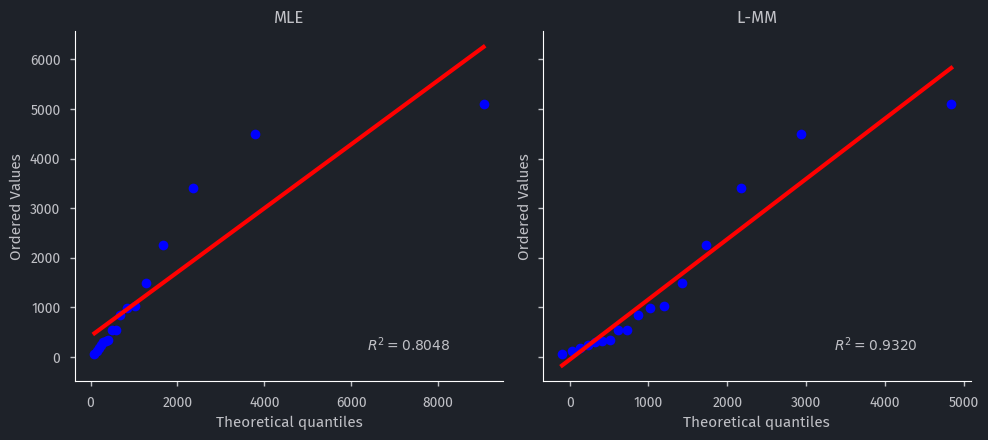

In [8]:
from scipy.stats import probplot

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4.5))
probplot(data, dist=X_mle, plot=axs[0], rvalue=True)
probplot(data, dist=X_lmm, plot=axs[1], rvalue=True)
axs[0].set_title('MLE')
axs[1].set_title('L-MM')
plt.tight_layout()